### ROC and AUC For ML Models

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.datasets import make_gaussian_quantiles


In [11]:
X_1, y_1 = make_gaussian_quantiles(n_samples= 100,
                                 n_features=2,
                                 n_classes=2,
                                 )

# transform the dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X1, y1 = ros.fit_resample(X_1, y_1)



X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,
                                              test_size=0.25,
                                              random_state=1)

In [20]:
model1 = LogisticRegression(random_state=1)
model2 = SVC(kernel= "rbf", probability=True)
model3 = DecisionTreeClassifier(random_state=1)
model4 = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
model5 = KNeighborsClassifier(n_neighbors=5)
model6  = RandomForestClassifier(random_state=1)                              

In [21]:
model_lr = model1.fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_SVC = model2.fit(X_train, y_train)
probs_SVC = model_SVC.predict_proba(X_test)[:, 1]

model_dt = model3.fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]


model_gb = model4.fit(X_train, y_train)
probs_gb = model_gb.predict_proba(X_test)[:, 1]

model_KNN =  model5.fit(X_train, y_train)
probs_KNN = model_KNN.predict_proba(X_test)[:, 1]

model_rf = model6.fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

In [26]:
y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test_int, probs_lr)

auc_SVC = roc_auc_score(y_test_int, probs_SVC)
fpr_SVC, tpr_SVC, _ = roc_curve(y_test_int, probs_SVC)

auc_dt = roc_auc_score(y_test_int, probs_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test_int, probs_dt)

auc_gb = roc_auc_score(y_test_int, probs_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test_int, probs_gb)

auc_KNN = roc_auc_score(y_test_int, probs_KNN)
fpr_KNN, tpr_KNN, _ = roc_curve(y_test_int, probs_KNN)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test_int, probs_rf)


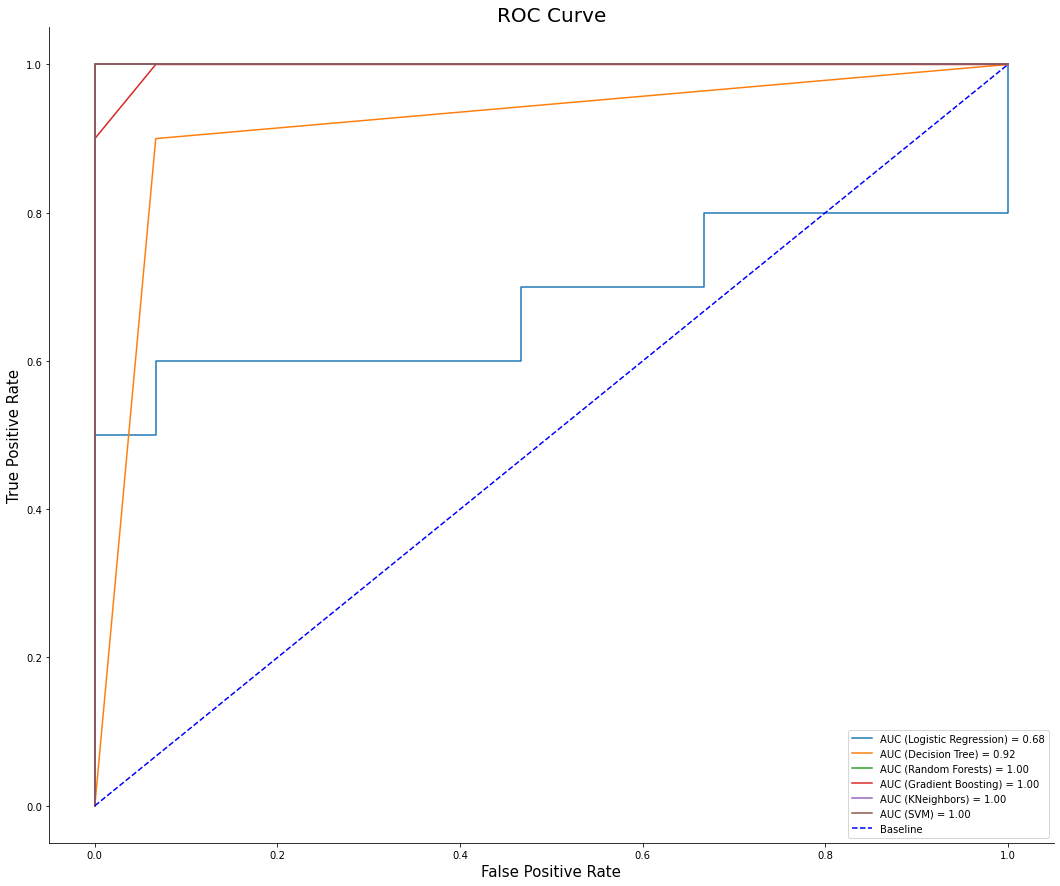

In [27]:
plt.figure(figsize=(18, 15))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gradient Boosting) = {auc_gb:.2f}')
plt.plot(fpr_KNN, tpr_KNN, label=f'AUC (KNeighbors) = {auc_KNN:.2f}')
plt.plot(fpr_SVC, tpr_SVC, label=f'AUC (SVM) = {auc_SVC:.2f}')


plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.legend()